# Weather Patterns and Unemployment Rates in Toronto, ON

Is there a relationship between temperature and unemployment rates? 

To answer this question, I've gathered two datasets corresponding to the city of Toronto, ON:
   - Unemployment data from [Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029401&pickMembers%5B0%5D=2.5&pickMembers%5B1%5D=3.1&pickMembers%5B2%5D=4.2)
   - Weather data from [weatherstats.ca](https://toronto.weatherstats.ca/charts/temperature-yearly.html)

With the help of the plots at the end of this page, I invite you to observe the temperature and unemployment trends and try to find a common pattern, if it exists.

The plots created indicate the average maximum and minimum temperatures recorded through each month of the year during the last 10 years. Moreover, because the economy fluctuates a lot in 10 years, I created 2 different subplots: 2001-2005 and 2006-2010, to unmask any trends that could be related to specific time periods (e.g. the 2007 recession).

As you can see, temperature varies greatly in Toronto with very cold winters and hot summers.
The 2001-2005 plot shows what seems to be a stable unemployment rate that lays between 7%-7.4%.  On the other hand, the 2006-2008 plot shows a much higher unemployment rate, which visually doesn't seem to follow any temperature or seasonal trends. This result could be explained by the 2007 recession that lasted until 2009, which increased unemployment rates across the globe. However, further analysis must be made before making any final conclusions.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

### Unemployment Data

In [3]:
df0 = pd.read_csv('unajusted_10y.csv', header = 7)
df0 = df0[df0["Geography4 5"] == "Toronto, Ontario"]                 
df0

,Geography4 5,March 2001,April 2001,May 2001,June 2001,July 2001,August 2001,September 2001,October 2001,November 2001,...,March 2010,April 2010,May 2010,June 2010,July 2010,August 2010,September 2010,October 2010,November 2010,December 2010
23,"Toronto, Ontario",6.0,6.3,6.2,6.2,6.1,6.1,6.0,6.2,6.6,...,9.3,9.5,9.4,9.2,9.0,9.2,9.5,9.4,8.9,8.4


In [4]:
df0_ = df0.T.reset_index().drop(0)
df0_.rename(columns={23:'Unemployment Rate', 'index':'Date'}, inplace=True)
df0_['Unemployment Rate'] = df0_['Unemployment Rate'].astype(float)

In [5]:
df0_['Date']=df0_['Date'].apply(lambda x: pd.Period(x))
df0_['Month']=df0_['Date'].apply(lambda x: x.month)

In [6]:
df1 = df0_.set_index('Date')['2001':'2005']
df2 = df0_.set_index('Date')['2006':'2010']

In [7]:
df_avg1 = df1.groupby('Month').agg({'Unemployment Rate': 'mean'})
df_avg2 = df2.groupby('Month').agg({'Unemployment Rate': 'mean'})

### Temperature Data

In [8]:
df_temp0 = pd.read_csv('weatherstats_toronto_normal_monthly.csv')
df_temp0['date'] = pd.to_datetime(df_temp0['date'])

In [9]:
df_temp0 = df_temp0[['date','max_temperature_v', 'min_temperature_v']]
df_temp0['Month']=df_temp0['date'].apply(lambda x: x.month)
df_temp0.set_index('date', inplace=True)

In [10]:
df_temp1 = df_temp0['2005':'2001']
df_temp2 = df_temp0['2010':'2006']

In [11]:
df_temp_avg_1 = df_temp1.groupby('Month').agg({'max_temperature_v': 'mean', 'min_temperature_v': 'mean'})
df_merged_1 = pd.merge(df_avg1, df_temp_avg_1, how = 'inner', left_index = True, right_index = True)

df_temp_avg_2 = df_temp2.groupby('Month').agg({'max_temperature_v': 'mean', 'min_temperature_v': 'mean'})
df_merged_2 = pd.merge(df_avg2, df_temp_avg_2, how = 'inner', left_index = True, right_index = True)

### Plotting

<IPython.core.display.Javascript object>


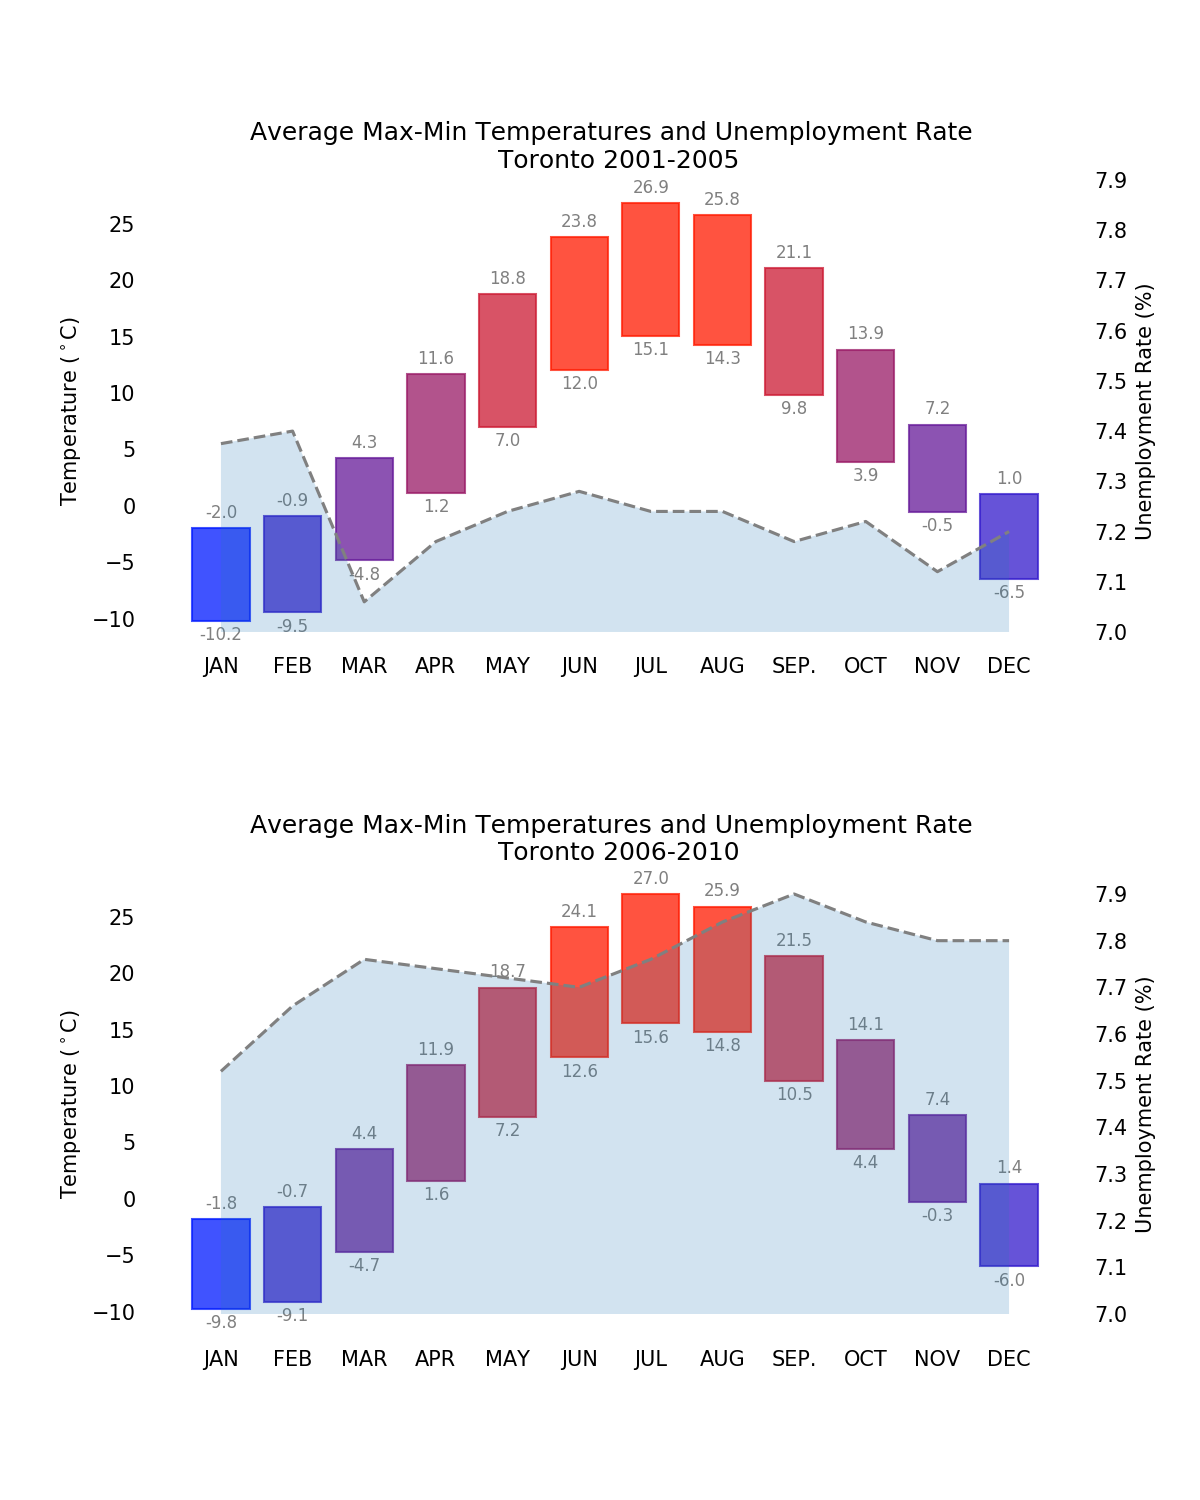

In [12]:
plt.figure(figsize=(8,10))
months = ['JAN','FEB','MAR', 'APR','MAY','JUN','JUL','AUG','SEP.','OCT','NOV','DEC']
my_colors = [( min(x,1),0.1, max(0,1-x)) for x in np.arange(0,14,2)/10] + [(1-x ,0.1, x) for x in np.arange(0,10,2)/10]

#TOP SUBPLOT
ax1 = plt.subplot(2, 1, 1)
ax1.bar(df_merged_1['max_temperature_v'].index, df_merged_1['max_temperature_v'] - df_merged_1['min_temperature_v']
        ,bottom=df_merged_1['min_temperature_v'],  color=my_colors, alpha = 0.75, edgecolor=my_colors)

plt.xticks(np.arange(1, 13, step=1), months);

ax2=ax1.twinx()
ax2.plot(df_merged_1['Unemployment Rate'], linestyle='--',color = 'grey', label = '2001-05 Unemployment Avergage');
ax2.fill_between(df_merged_1.index, df_merged_1['Unemployment Rate'], 7, alpha = 0.2)
ax2.yaxis.set_ticks(np.arange(7, 8, 0.1));


#BOTTOM SUBPLOT
ax3 = plt.subplot(2,1,2, sharey=ax1)
ax3.bar(df_merged_2['max_temperature_v'].index, df_merged_2['max_temperature_v'] - df_merged_2['min_temperature_v']
        ,bottom=df_merged_2['min_temperature_v'], color=my_colors, alpha=0.75, edgecolor=my_colors)

plt.xticks(np.arange(1, 13, step=1), months);

ax4=ax3.twinx()
ax4.plot(df_merged_2['Unemployment Rate'], linestyle='--',color = 'grey', label = '2006-10 Unemployment Avergage');
ax4.fill_between(df_merged_2.index, df_merged_2['Unemployment Rate'], 7, alpha = 0.2);
ax4.yaxis.set_ticks(np.arange(7, 8, 0.1));


#OTHER PLOT SETTINGS
for ax in plt.gcf().get_axes():
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5); #adjust space between subplots

ax1.set_title('Average Max-Min Temperatures and Unemployment Rate \n Toronto 2001-2005');
ax3.set_title('Average Max-Min Temperatures and Unemployment Rate \n Toronto 2006-2010');

ax1.set_ylabel('Temperature ($^\circ$C)', color='black')
ax2.set_ylabel('Unemployment Rate (%)', color='black')
ax3.set_ylabel('Temperature ($^\circ$C)', color='black')
ax4.set_ylabel('Unemployment Rate (%)', color='black')

ax1.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on');
ax2.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on');
ax3.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on');
ax4.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on');

y1=df_merged_1['max_temperature_v']
for i, v in enumerate(y1):
    ax1.text(i+1, v+.9,str(round(v,1)), color='grey', ha='center', fontsize=8)

y1=df_merged_1['min_temperature_v']
for i, v in enumerate(y1):
    ax1.text(i+1, v-1.7,str(round(v,1)), color='grey', ha='center', fontsize=8)
    
y2=df_merged_2['max_temperature_v']
for i, v in enumerate(y2):
    ax3.text(i+1, v+.9,str(round(v,1)), color='grey', ha='center', fontsize=8)

y2=df_merged_2['min_temperature_v']
for i, v in enumerate(y2):
    ax3.text(i+1, v-1.7,str(round(v,1)), color='grey', ha='center', fontsize=8)
    
#plt.savefig('temp_unemp.png', dpi=300, bbox_inches='tight');